# Red neuronal: 

> Predicción del desempeño en la prueba matemática





In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Esto es para poder ver los axis en los plots usando el dark theme.
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

import numpy as np
import pandas as pd
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importo base de datos
tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)
df = tabla_df.copy()
df = df.replace('nc', np.nan)
df = df.replace(-1.000, np.nan)

In [ ]:
df.year_id.value_counts()

2016    892381
2017    569752
2013    370136
Name: year_id, dtype: int64

In [ ]:
replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    },
    'nivel_desemp_lengua':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    },
    'nivel_desemp_ciencias_sociales':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    },
    'nivel_desemp_ciencias_naturales':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
df.replace(to_replace=replace, value=None, inplace=True)

In [ ]:
df_f = df[df['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'indice_socioeconomico_medio', 'icse']]
df_f = df_f.dropna()

labels = np.array(df_f.nivel_desemp_matematica)
samples = np.array(df_f.loc[:, df_f.columns != 'nivel_desemp_matematica'])
#labels = df_f.nivel_desemp_matematica.values
#samples = df_f.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']].values
train_samples, test_samples, train_labels, test_labels = train_test_split(samples,labels,test_size = 0.2) 

scaler = MinMaxScaler()
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,3))

In [ ]:
import keras 
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
                    Dense(16, activation= 'softmax', input_shape = (3,)),
                    Dense(2, activation='softmax')
]) # Creo las capas.

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])#sparse_categorical_crossentropy

In [ ]:
%%time
model.fit(scaled_train_samples, train_labels, batch_size = 100, epochs = 20, shuffle = True, verbose = 2) #, validation_split = 0.2

Epoch 1/20
4180/4180 - 4s - loss: 0.6588 - accuracy: 0.6167
Epoch 2/20
4180/4180 - 3s - loss: 0.6482 - accuracy: 0.6320
Epoch 3/20
4180/4180 - 3s - loss: 0.6437 - accuracy: 0.6343
Epoch 4/20
4180/4180 - 3s - loss: 0.6430 - accuracy: 0.6348
Epoch 5/20
4180/4180 - 3s - loss: 0.6428 - accuracy: 0.6348
Epoch 6/20


KeyboardInterrupt: ignored

In [ ]:
scaler = MinMaxScaler()
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))
predictions = model.predict(scaled_test_samples.reshape(-1,3), batch_size = 1000, verbose = 0) # Da la probabilidad de 0 y 1. 
rounded_predictions = model.predict_classes(scaled_test_samples.reshape(-1,3), batch_size = 1000, verbose = 0)
rounded_predictions

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
  plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('floar')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else: 
    print(cm)
  
  thresh = cm.max()/2. 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment = 'center',
             color = 'white' if cm[i,j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 8413 55165]
 [ 3088 37834]]


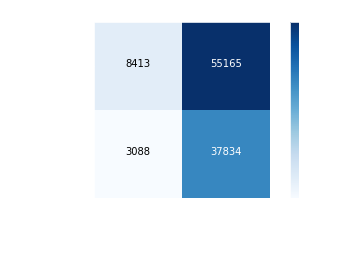

In [ ]:
cm_plot_labels = ['Desaprobado', 'Aprobado']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

# Otra

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Esto es para poder ver los axis en los plots usando el dark theme.
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Importo librerias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# Importo base de datos
tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/reg_tabla.csv', index_col=0)
df = tabla_df.copy()
#df = df.drop(columns = ['sexo', 'tiene_cable']) #Saco la columna de sexo porque demostramos que no es una variable que nos importe.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tiene_smartphone,nivel_desemp_matematica,ise_high,ise_low,ise_mid,ise_cat_high,ise_cat_low,ise_cat_mid
id,,,,,,,,
1037297.0,1.0,0,0,0,1,0,0,1
1014085.0,1.0,0,0,0,1,0,0,1
1130145.0,1.0,1,0,0,1,0,0,1
1047308.0,0.0,0,0,0,1,0,0,1
1206413.0,1.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1000351.0,1.0,0,1,0,0,1,0,0
1122927.0,0.0,1,0,0,1,1,0,0
973858.0,1.0,1,1,0,0,1,0,0


In [ ]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_f = df
Y = np.array(df_f.nivel_desemp_matematica)
X = np.array(df_f.loc[:, df_f.columns != 'nivel_desemp_matematica'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 
scaler = MinMaxScaler()
X_train = scaler.fit_transform((X_train).reshape(-1,7)) #(-1, número de columnas de X)


In [ ]:
import keras 
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential([
                    Dense(64, activation= 'sigmoid', input_shape = (7,)),
                    Dense(2, activation='relu')
]) # Creo las capas.

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])#sparse_categorical_crossentropy

In [ ]:
model.fit(X_train, Y_train, batch_size = 100, epochs = 20, shuffle = True, verbose = 2) #, validation_split = 0.2

Epoch 1/20
1907/1907 - 2s - loss: 0.8287 - accuracy: 0.6731
Epoch 2/20
1907/1907 - 2s - loss: 0.6965 - accuracy: 0.6766
Epoch 3/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 4/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 5/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 6/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 7/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 8/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 9/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 10/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 11/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 12/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 13/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 14/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 15/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 16/20
1907/1907 - 2s - loss: 0.6931 - accuracy: 0.6768
Epoch 17/20
1907/1907 - 2s - loss

In [ ]:
scaler = MinMaxScaler()
scaled_X_test = scaler.fit_transform((X_test).reshape(-1,1))
predictions = model.predict(scaled_X_test.reshape(-1,7), batch_size = 1000, verbose = 0) # Da la probabilidad de 0 y 1. 
rounded_predictions = model.predict_classes(scaled_X_test.reshape(-1,7), batch_size = 1000, verbose = 0)
rounded_predictions

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(Y_test, rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
  plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('floar')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else: 
    print(cm)
  
  thresh = cm.max()/2. 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment = 'center',
             color = 'white' if cm[i,j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicho')

[[25251  6883]
 [ 6641  8892]]


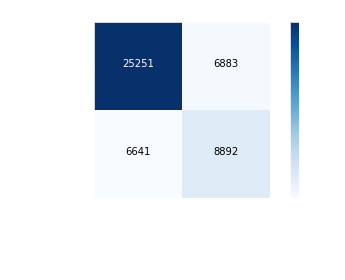

In [ ]:
cm_plot_labels = ['Desaprobado', 'Aprobado']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')